### Алгоритмические основы распознавания изображений
#### Лабораторная работа №5.
Задание. Реализовать алгоритм определения связных компонент на основе поиска регионов (итеративный алгоритм).

In [2]:
from PIL import Image, ImageDraw 
import math

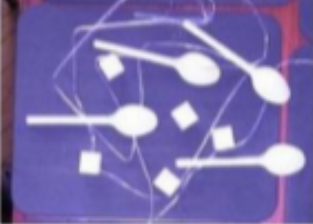

In [3]:
old_im = Image.open("test4.png") 
old_size = old_im.size
old_im

In [4]:
def _brightness_(pixels, x, y):
    R_value = pixels[x, y][0]
    G_value = pixels[x, y][1]
    B_value = pixels[x, y][2]
    Y = 0.222 * R_value + 0.707 * G_value + 0.071 * B_value
    return Y

# threshold = 50
threshold = 200

def _binarization_(image):
    
    pixels = image.load() 
    size = image.size
    new_image = Image.new("1", size, 255)
    
    draw = ImageDraw.Draw(new_image) 

    for i in range(size[0]):
        for j in range(size[1]):
            if _brightness_(pixels, i, j) > threshold:
                draw.point([i, j], 255)
            else:
                draw.point([i, j], 0)
            
    del draw 
    return new_image

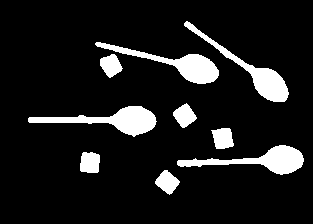

In [5]:
bin_im = _binarization_(old_im)
pix_bin = bin_im.load()
bin_im

In [6]:
def _marks_(bin_im, item_color):
    
    marks = {}
    
    for i in range(bin_im.size[0]):
        for j in range(bin_im.size[1]):
        
            if pix_bin[i, j] == item_color: 
            
                if (i, j - 1) not in marks and (i - 1, j) not in marks:
                    if len(marks) == 0:
                        marks[(i, j)] = 1
                    else:
                        marks[(i, j)] = max(marks.values()) + 1
            
                elif (i, j - 1) in marks and (i - 1, j) in marks:
                    marks[(i, j)] = marks[(i - 1, j)]
                    if marks[(i, j - 1)] != marks[(i - 1, j)]:
                        k = j - 1
                        while (i, k) in marks:
                            marks[(i, k)] = marks[(i, j)]
                            k -= 1
            
                elif (i - 1, j) in marks:
                    marks[(i, j)] = marks[(i - 1, j)]
            
                elif (i, j - 1) in marks:
                    marks[(i, j)] = marks[(i, j - 1)]
                
    return marks

In [12]:
# black background, white regions
marks = _marks_(bin_im, 255)
marks

# # white backgroung, black regions
# marks = _marks_(bin_im, 0)
# marks

{(28, 118): 1,
 (28, 119): 1,
 (28, 120): 1,
 (28, 121): 1,
 (29, 117): 1,
 (29, 118): 1,
 (29, 119): 1,
 (29, 120): 1,
 (29, 121): 1,
 (29, 122): 1,
 (30, 117): 1,
 (30, 118): 1,
 (30, 119): 1,
 (30, 120): 1,
 (30, 121): 1,
 (30, 122): 1,
 (31, 117): 1,
 (31, 118): 1,
 (31, 119): 1,
 (31, 120): 1,
 (31, 121): 1,
 (31, 122): 1,
 (32, 117): 1,
 (32, 118): 1,
 (32, 119): 1,
 (32, 120): 1,
 (32, 121): 1,
 (32, 122): 1,
 (33, 117): 1,
 (33, 118): 1,
 (33, 119): 1,
 (33, 120): 1,
 (33, 121): 1,
 (33, 122): 1,
 (34, 117): 1,
 (34, 118): 1,
 (34, 119): 1,
 (34, 120): 1,
 (34, 121): 1,
 (34, 122): 1,
 (35, 117): 1,
 (35, 118): 1,
 (35, 119): 1,
 (35, 120): 1,
 (35, 121): 1,
 (35, 122): 1,
 (36, 117): 1,
 (36, 118): 1,
 (36, 119): 1,
 (36, 120): 1,
 (36, 121): 1,
 (36, 122): 1,
 (37, 117): 1,
 (37, 118): 1,
 (37, 119): 1,
 (37, 120): 1,
 (37, 121): 1,
 (37, 122): 1,
 (38, 117): 1,
 (38, 118): 1,
 (38, 119): 1,
 (38, 120): 1,
 (38, 121): 1,
 (38, 122): 1,
 (39, 117): 1,
 (39, 118): 1,
 (39, 119)

In [13]:
max(marks.values())

9

In [14]:
marks_values_new = []
for i in marks.values():
    if i not in marks_values_new:
        marks_values_new.append(i)
marks_values_new      

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [15]:
# Blue colors

colors = {}

for i in marks_values_new:
    colors[i] = (0, (255 - 40 * i) % 255, (255 - 20 * i) % 255)
    
colors

{1: (0, 215, 235),
 2: (0, 175, 215),
 3: (0, 135, 195),
 4: (0, 95, 175),
 5: (0, 55, 155),
 6: (0, 15, 135),
 7: (0, 230, 115),
 8: (0, 190, 95),
 9: (0, 150, 75)}

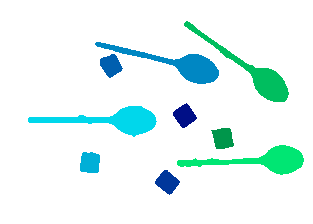

In [16]:
colorWhite = (255, 255, 255) 
new_im = Image.new("RGB", old_size, colorWhite)  

draw = ImageDraw.Draw(new_im)

for i in range(new_im.size[0]):
    for j in range(new_im.size[1]):
        
        if (i, j) in marks:
            draw.point((i, j), colors[marks[(i, j)]])
        
del draw
new_im